## 1) DESCRIPTION:-
##### -In This Notebook, We Are Going To Predict Whether A Person's Income Is Above 50k Or Below 50k Using Various Features Like Age, Education, & Occupation.

##### -The Dataset We Are Going To Use Is The Adult Census Income Dataset From Kaggle Which Contains About 32561 Rows & 15 Features That Can Be Downloaded Here.

##### -The Dataset Contains The Labels Which We Have To Predict And The Labels Are Discrete And Binary. So The Problem We Have Is A Supervised Classification Type.

#### 1.1 STEP:-0 LOAD LIBRARIES AND DATASET:-

In [1]:
# IMPORT LIBRARIES:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORTING DATASET:-
dataset = pd.read_csv('adult.csv')

#### 1.2 STEP:-1 DESCRIPTIVE ANALYSIS:-

In [3]:
# PREVIEW DATASET:-

dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# SHAPE OF DATASET:-
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 48842 Columns: 15


In [5]:
# FEATURES DATA_TYPE:-
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# STATISTICAL SUMMARY:-
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
# CHECK FOR NULL VALUES

round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

In [8]:
# CHECK FOR '?' IN DATASET:-
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [9]:
# CHECKING THE COUNTS OF LABEL CATEGORIES:-
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
<=50K    76.07 %
>50K     23.93 %
Name: proportion, dtype: object

## 1.2.1. OBSERVATIONS:-

##### - The Dataset Doesn't Have Any Null Values, But It Contains Missing In The Form Of '?' Which Needs To Be Preprocessed.

##### - The Dataset Is Unbalanced, As The Dependent Features 'income' Contains 75.92% Values Have Income Less Than 50k & 24.08% Values Have Income More Than 50k. 

### 1.3 STEP:-2 EXPLORATORY DATA ANALYSIS:-
##### 1.3.1  2.1: UNIVARIATE ANALYSIS:-

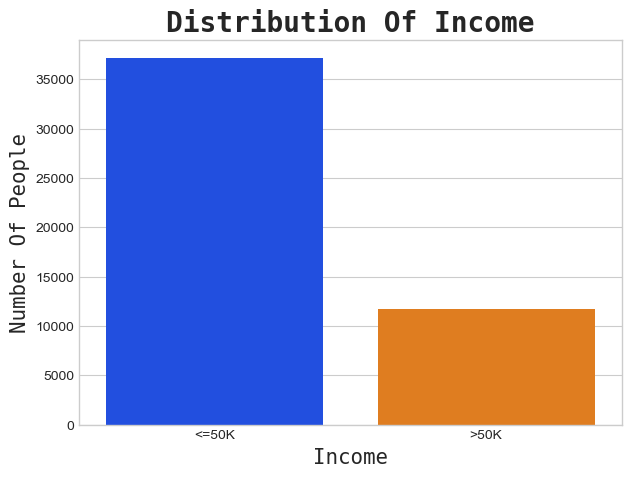

In [10]:
# CREATING A BARPLOT FOR 'INCOME':-
income = dataset['income'].value_counts()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution Of Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontdict={
            'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

###### LIST AVAILABLE STYLES:-

In [11]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


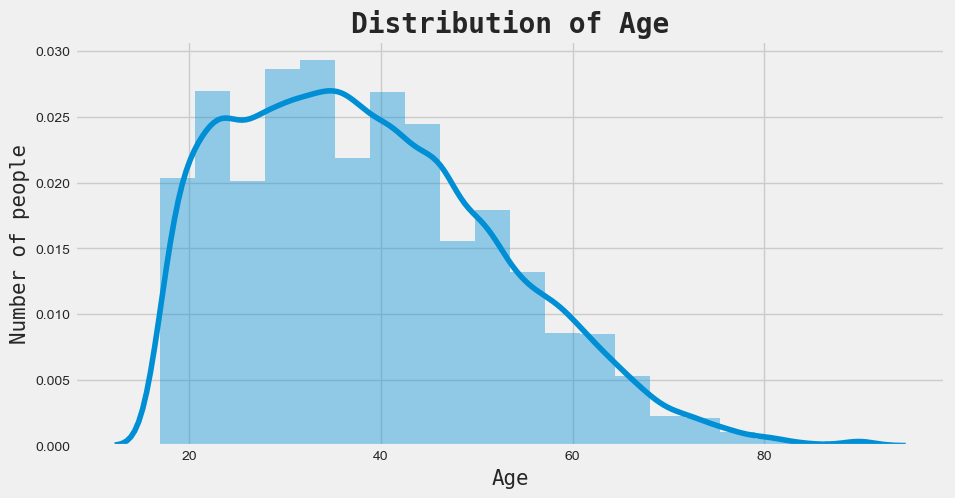

In [13]:
# CREATING A DISTRIBUTION PLOT FOR 'AGE':-
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


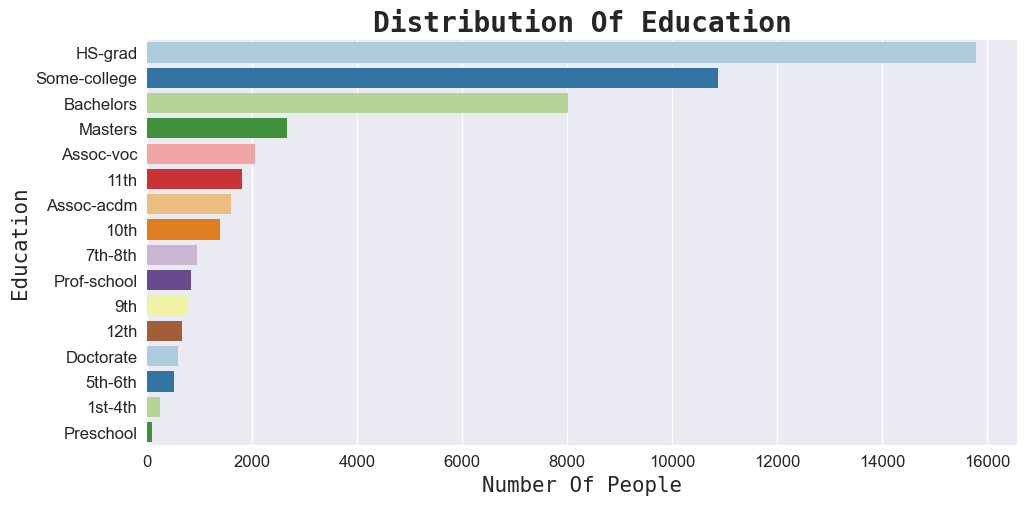

In [14]:
# CREATING A BARPLOT FOR 'EDUCATION':-

edu = dataset['education'].value_counts()

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution Of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Number Of People', fontdict={
    'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()    

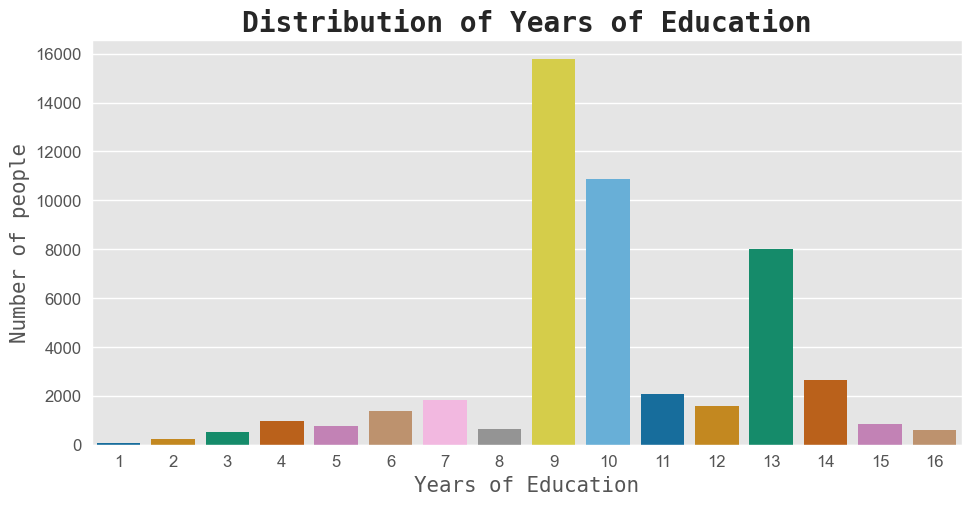

In [15]:
# CREATING A BARPLOT FOR "YEAR OF EDUCATION"
edu_num = dataset['educational-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In [16]:
print(dataset.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


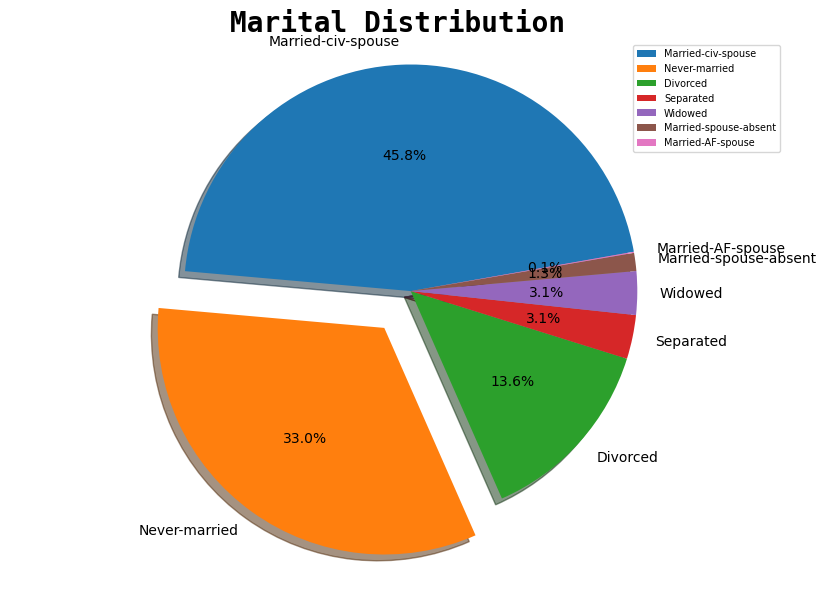

In [17]:
# CREATING A PIE CHART FOR 'MARITAL STATUS':-

marital = dataset['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital Distribution', fontdict={
           'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size' : 7})
plt.axis('equal')
plt.show()

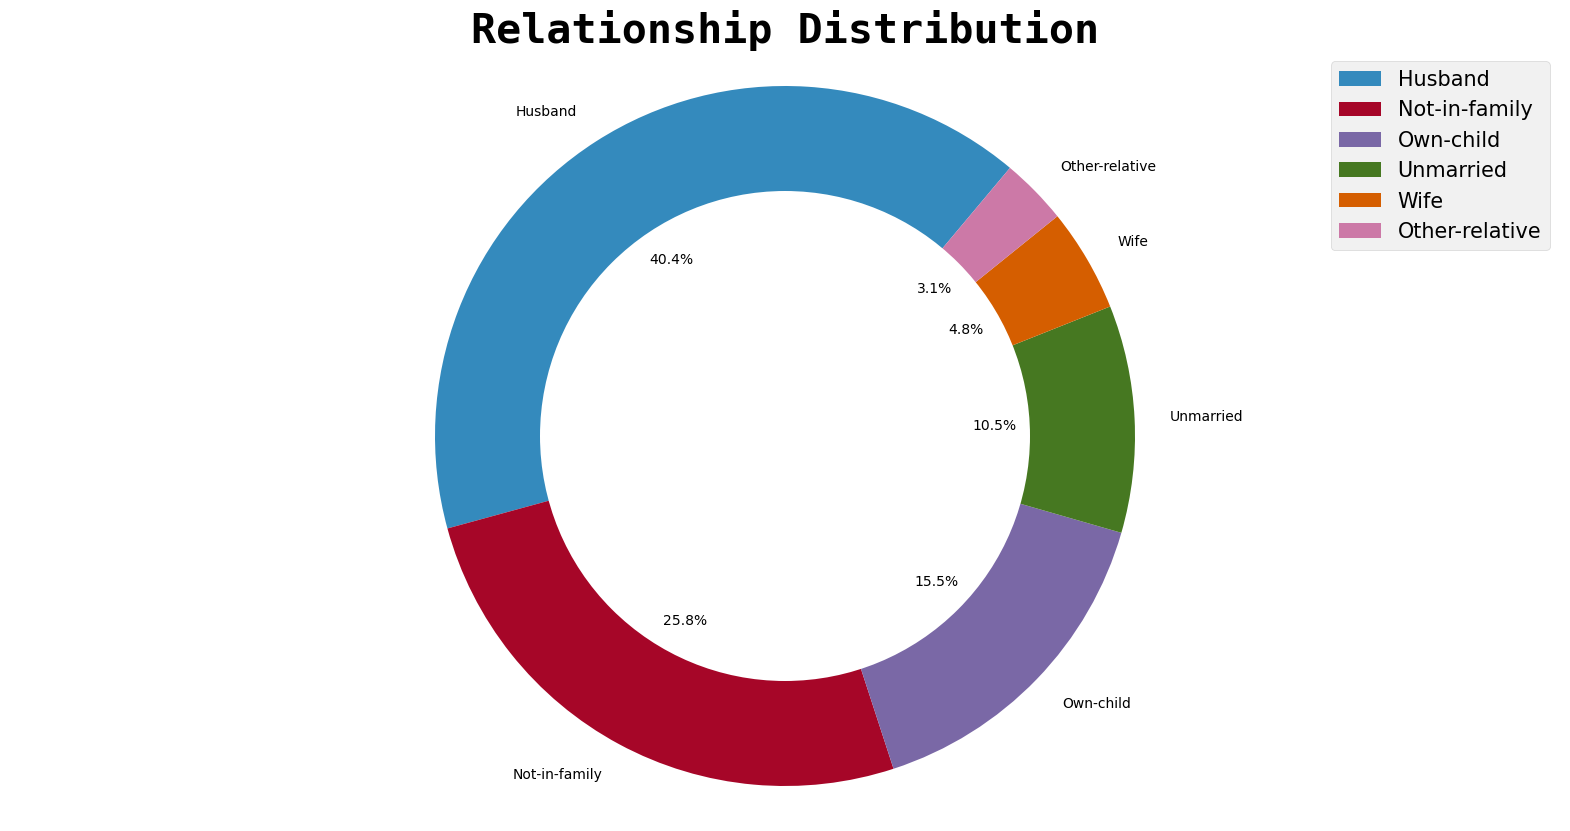

In [18]:
# CREATING A DONUT CHART FOR 'AGE':-

relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()
        

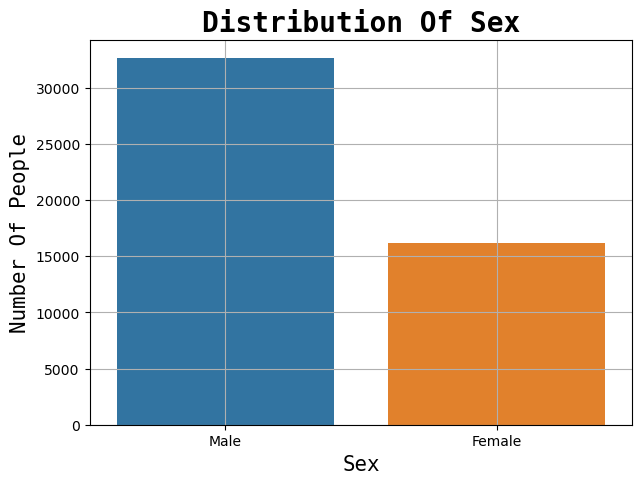

In [19]:
# CREATING A BARPLOT FOR 'SEX':-

sex = dataset['gender'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution Of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

Note: you may need to restart the kernel to use updated packages.


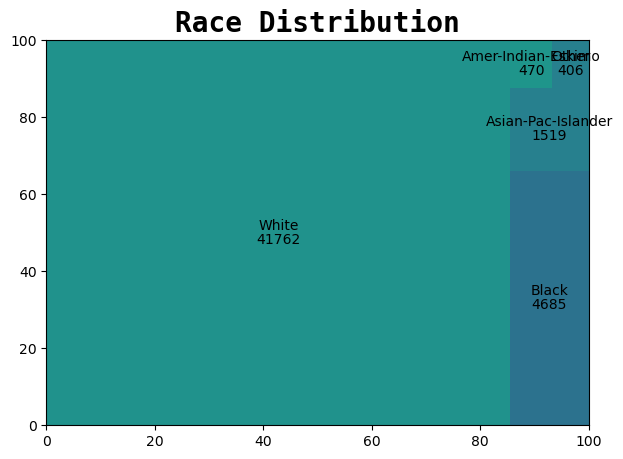

In [20]:
# CREATING A TREEMAP FOR 'RACE':-

%pip install squarify

import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race Distribution', fontdict={
           'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

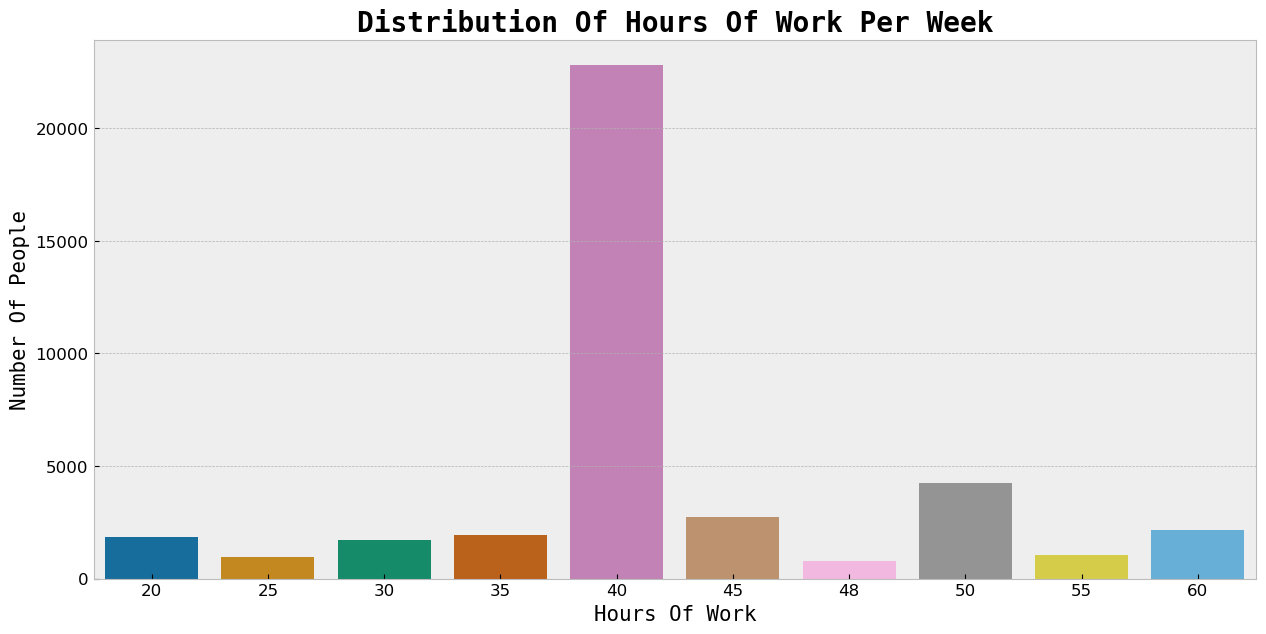

In [21]:
# CREATING A BARPLOT FOR 'HOURS PER WEEK'

hours = dataset['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.title('Distribution Of Hours Of Work Per Week', fontdict={
           'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours Of Work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### b) BIVARIATE ANALYSIS:-

findfont: Font family 'fontname' not found.
findfont: Font family 'fontsize' not found.
findfont: Font family 'fontweight' not found.
findfont: Font family 'fontname' not found.
findfont: Font family 'fontsize' not found.
findfont: Font family 'fontweight' not found.
findfont: Font family 'fontname' not found.
findfont: Font family 'fontsize' not found.
findfont: Font family 'fontweight' not found.
findfont: Font family 'fontname' not found.
findfont: Font family 'fontsize' not found.
findfont: Font family 'fontweight' not found.
findfont: Font family 'fontname' not found.
findfont: Font family 'fontsize' not found.
findfont: Font family 'fontweight' not found.


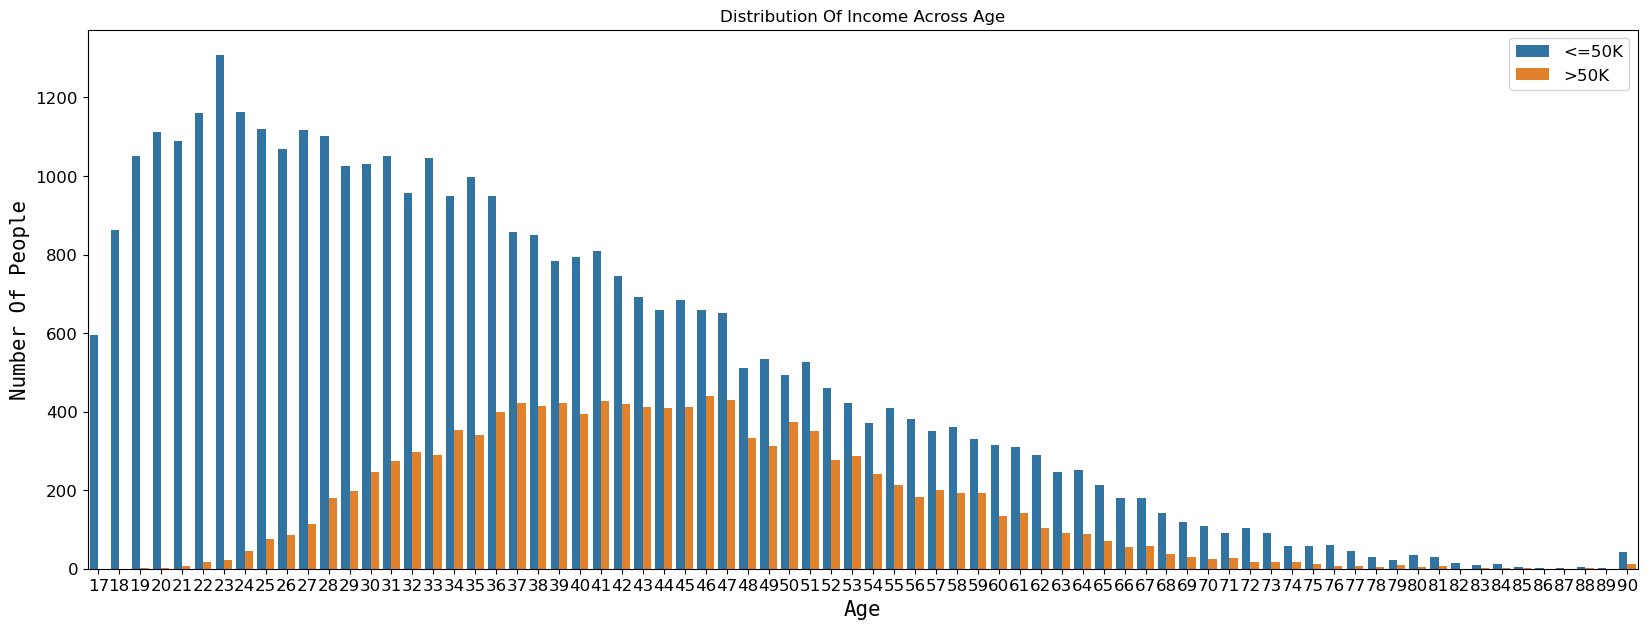

In [22]:
# CREATING A COUNTPLOT OF INCOME ACROSS AGE:-

plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x='age', hue='income', data=dataset)
plt.title('Distribution Of Income Across Age', fontname= {'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

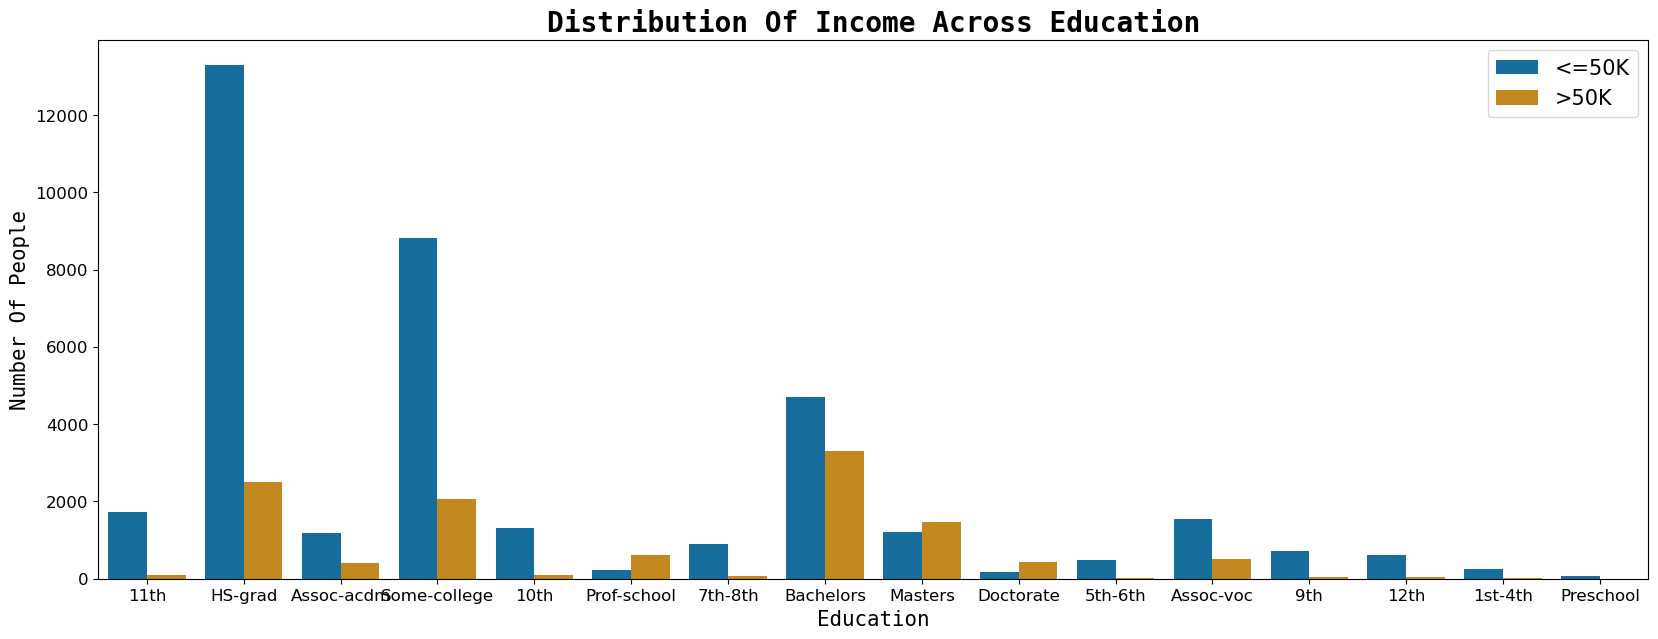

In [23]:
# CREATING A COUNTPLOT OF INCOME ACROSS EDUCATION:-

plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['education'],
              hue=dataset['income'],palette='colorblind')
plt.title('Distribution Of Income Across Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

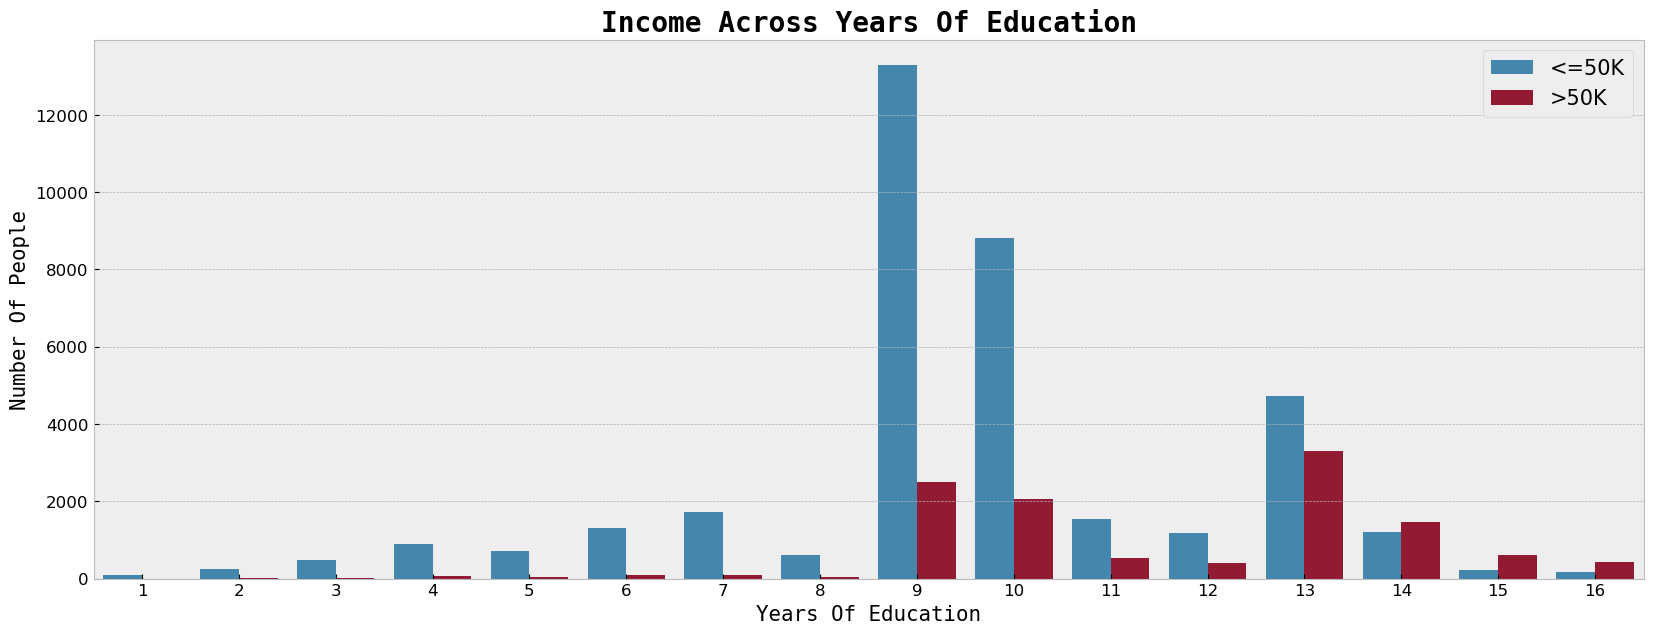

In [26]:
# CREATING A COUNTPLOT OF INCOME ACROSS YEARS OF EDUCATION:-

plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['educational-num'],hue=dataset['income'])
plt.title('Income Across Years Of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years Of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

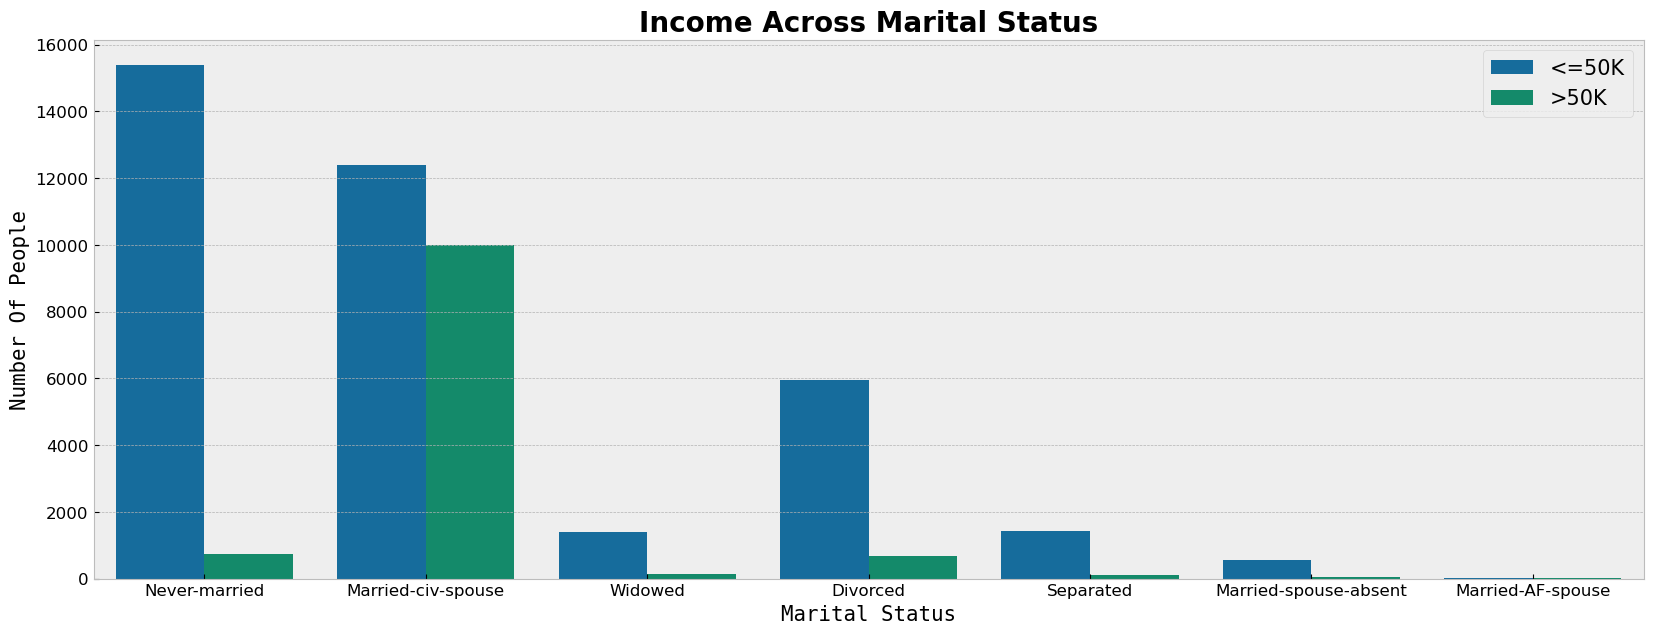

In [27]:
# CREATING A COUNTPLOT OF INCOME ACROSS MARITAL STATUS:-

plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(20,  7))
sns.countplot(x=dataset['marital-status'], hue=dataset['income'])
plt.title('Income Across Marital Status', fontsize= 20, fontweight= 'bold')
plt.xlabel('Marital Status', fontsize= 15, fontname='Monospace')
plt.ylabel('Number Of People', fontsize=15, fontname='Monospace')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()
 

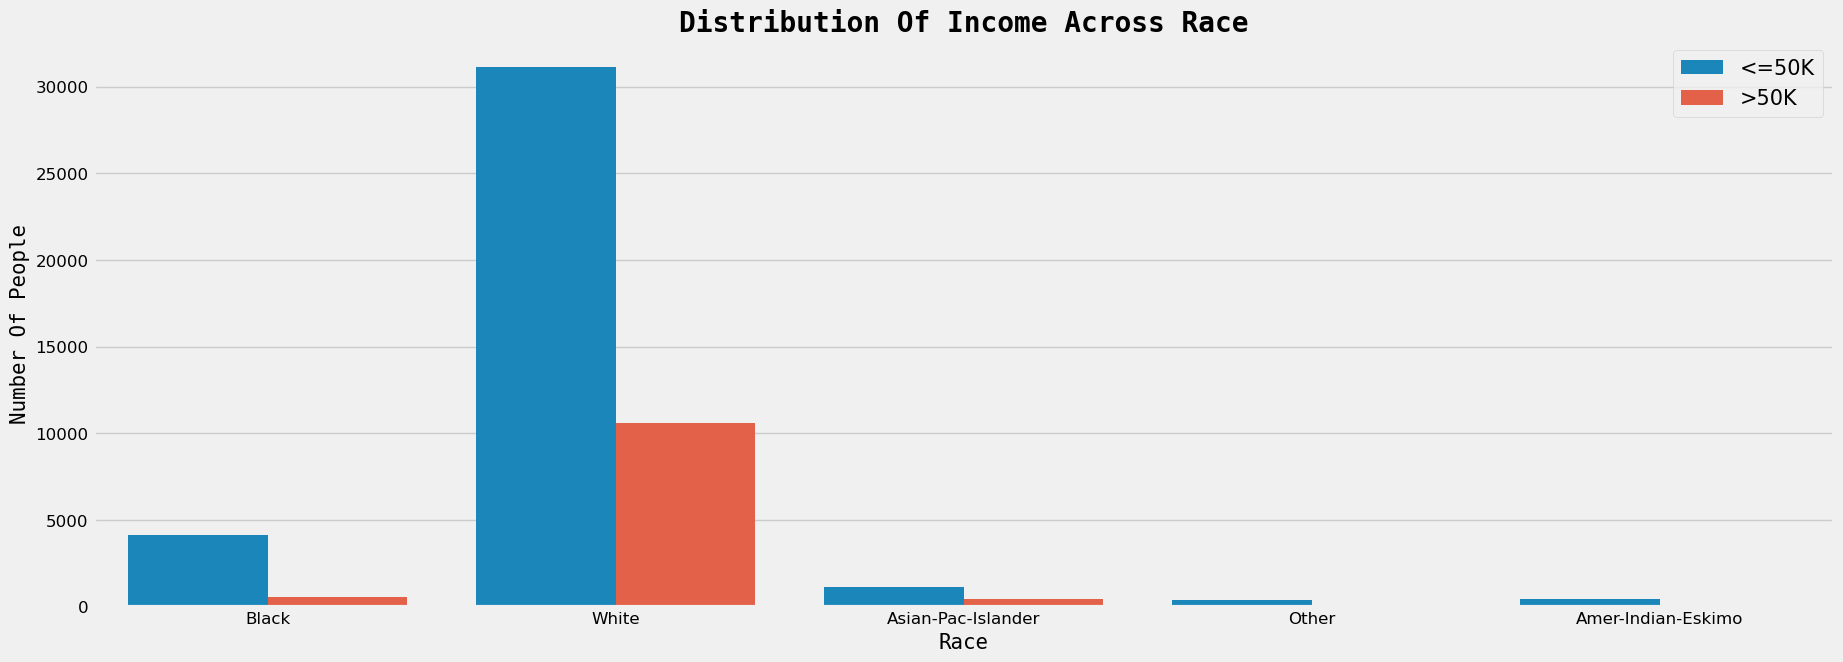

In [28]:
# CREATING A COUNTPLOT OF INCOME ACROSS RACE:-

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['race'], hue=dataset['income'])
plt.title('Distribution Of Income Across Race', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number Of People', fontsize=15, fontname='Monospace')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size':15})
plt.show()       

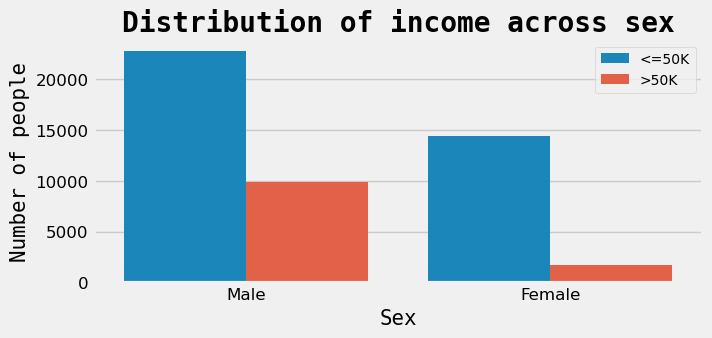

In [29]:
# CREATING A COUNTPLOT OF INCOME ACROSS SEX:-

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=dataset['gender'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 1.3.3. 2.3 MULTIVARIATE ANALYSIS:-

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
dataset['income'] = le.fit_transform(dataset['income'])

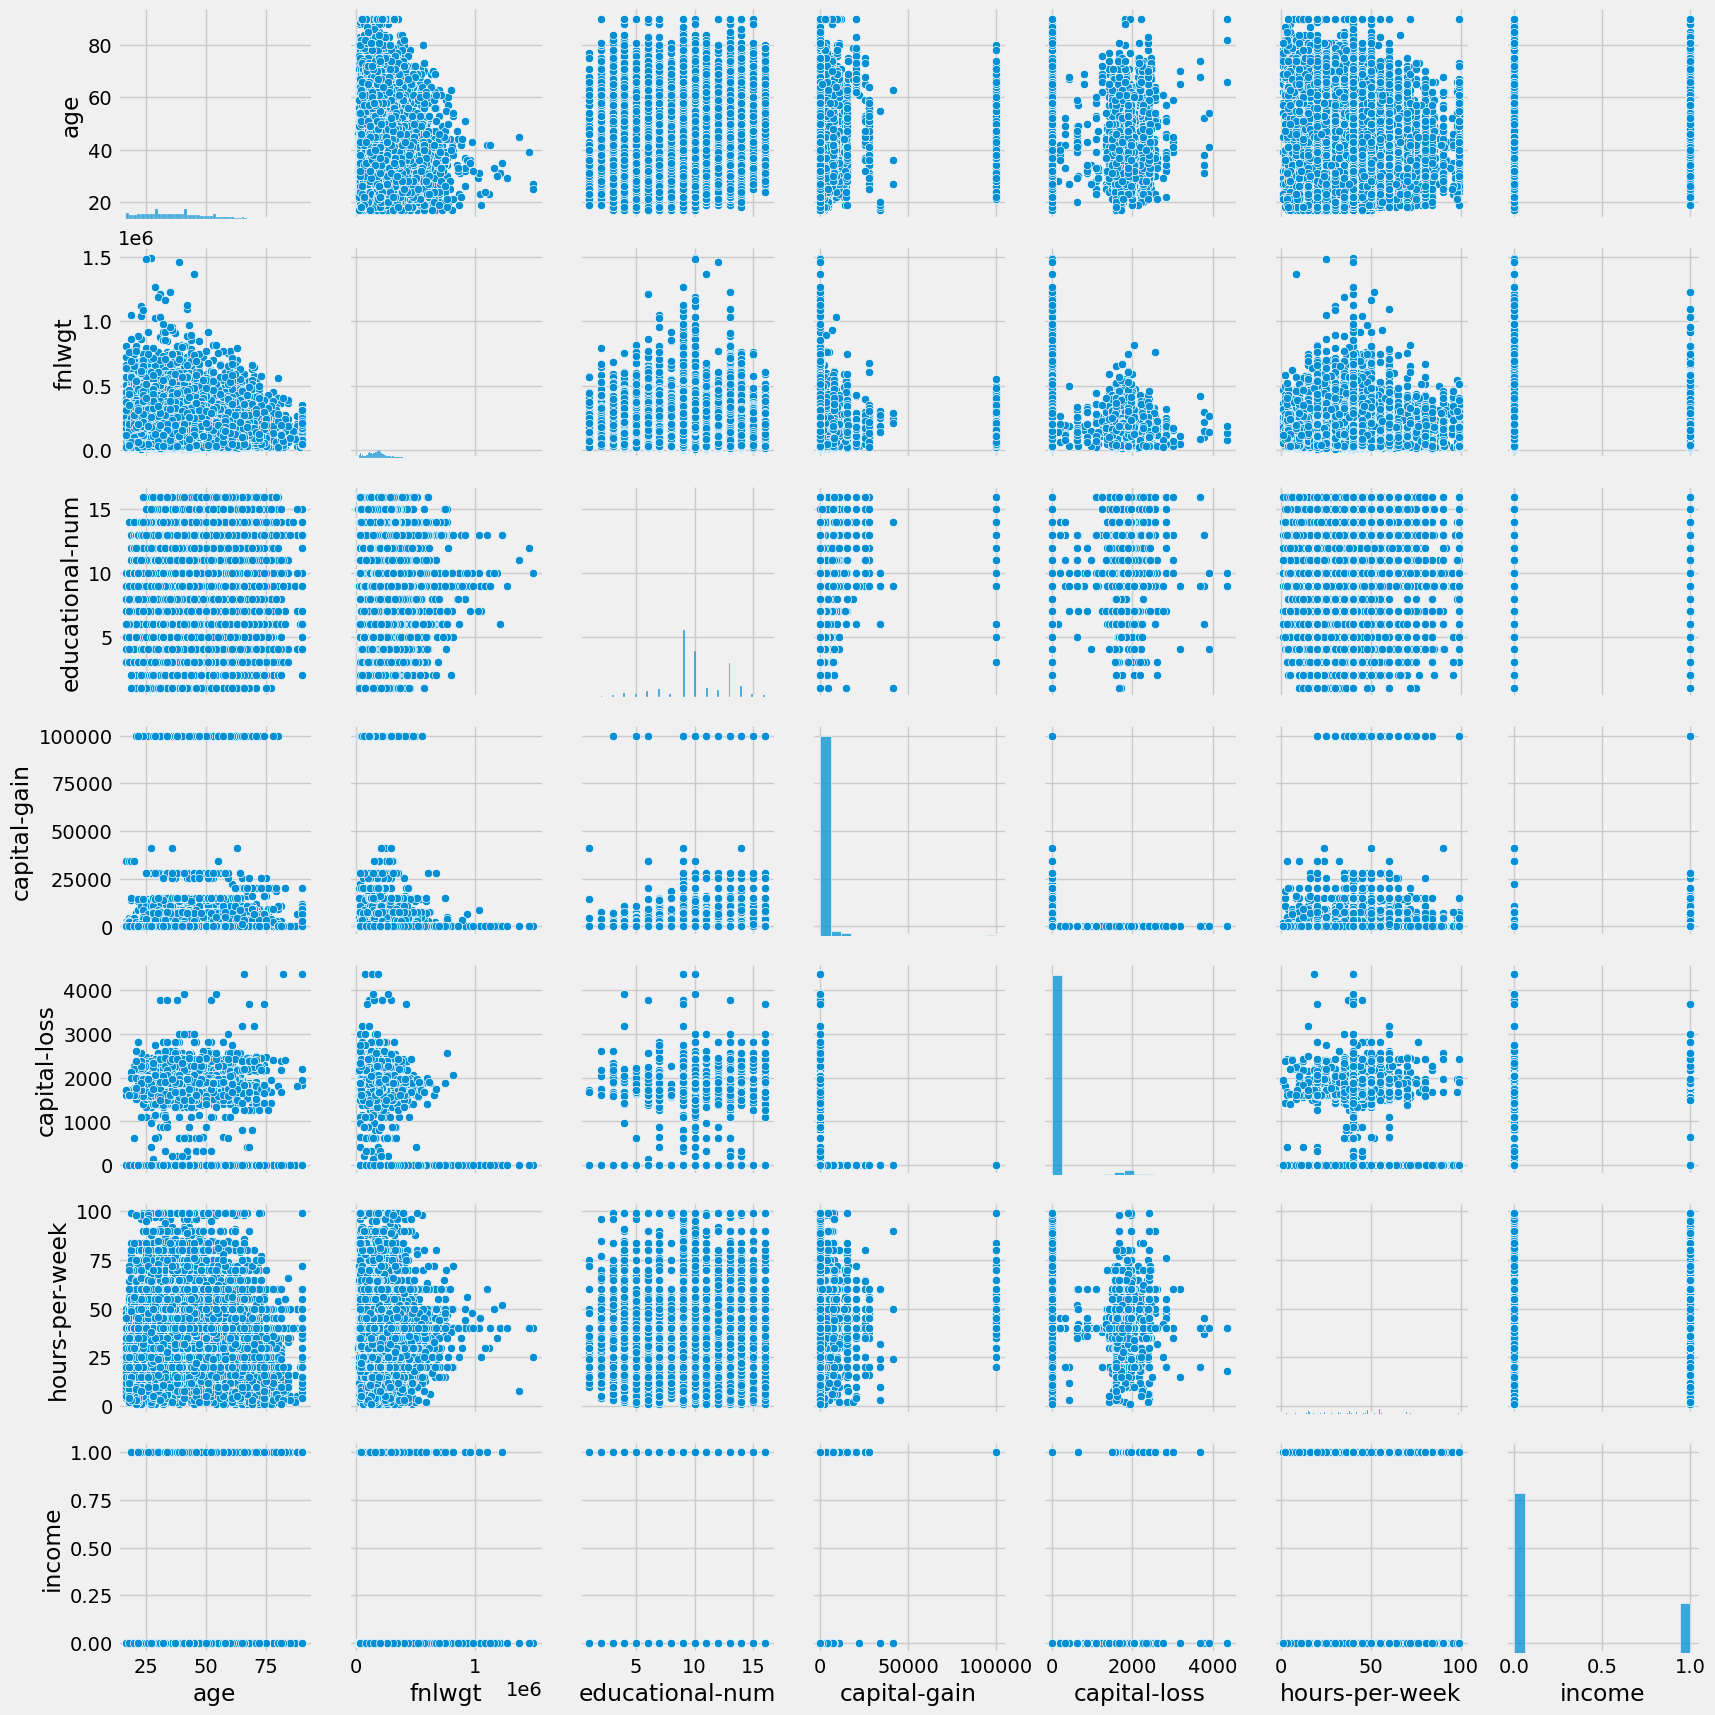

In [32]:
# CREATING A PAIRPLOT OF DATASET:-
sns.pairplot(dataset)
plt.savefig('multil.png')
plt.show()

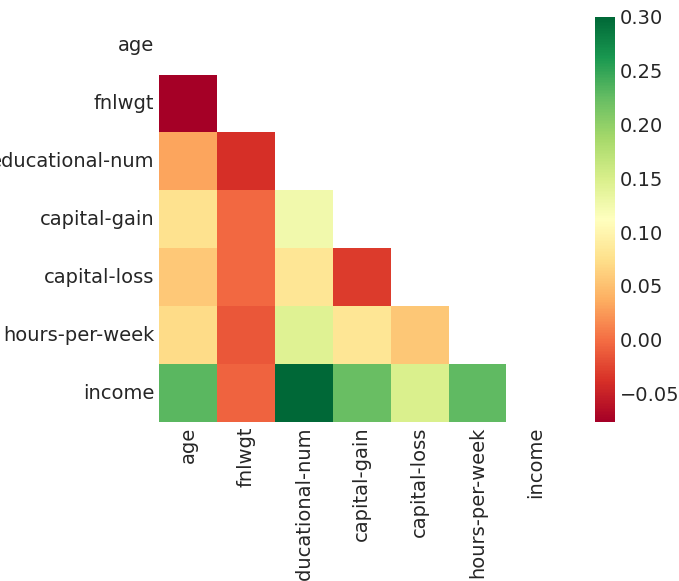

In [33]:
# ASSUMING 'DATASET' IS YOUR DATAFRAME:-
# Convert All Columns To Numeric, Forcing Errors To NaN
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# DROP COLUMNS THAT ARE COMPLETELY NON-NUMERIC:-
dataset = dataset.dropna(axis=1, how='all')

# NOW CALCULATE THE CORRELATION MATRIX:-
corr =dataset.corr()

# CREATE A MASK FOR THE UPPER TRIANGLE:-
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# SET UP THE MATPLOTLIB FIGURE:-
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='RdYlGn')

# SAVE THE FIGURE:-
plt.savefig('multi2.png')
plt.show()

### 1.3.4. OBSERVATIONS:-

##### -In This Dataset, The Most Number Of People Are Young, White, Male, High School Graduates With 9 To 10 Years Of Education & Work 40 Hours Per Week.
##### -From The Correlation Heatmap, We Can See That The Dependent Features 'Income' Is Highly Correlated With Age, Numbers Of Years Of Education, Capital Gain & Numbers Of Hours Per Week.

## 1.4 STEP:- 3 DATA PREPROCESSING:-
#### 1.4.1. 3.1: FIXING '?' VALUES IN THE DATASET

In [34]:
dataset = dataset.replace('?', np.nan)

In [35]:
# CHECKING NULL VALUES:-
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
fnlwgt             0.0 %
educational-num    0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
income             0.0 %
dtype: object

In [35]:
# columns_with_nan = ['workclass', 'occupation', 'native.country']

In [38]:
# for col in columns_with_nan:
#    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

#### 1.4.2. 3.2: LABEL ENDOCING:-

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

#### 1.4.3. 3.3: FEATURE SELECTION:-

In [38]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
selector =ExtraTreesClassifier(random_state=42)

In [40]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [41]:
feature_imp = selector.feature_importances_

In [42]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 18.26
1 41.98
2 12.13
3 12.4
4 4.27
5 10.97


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   educational-num  48842 non-null  int64
 3   capital-gain     48842 non-null  int64
 4   capital-loss     48842 non-null  int64
 5   hours-per-week   48842 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


In [52]:
# X = X.drop(['workclass', 'education', 'race', 'sex', 'capital.loss', 'native.country'], axis=1)

#### 1.4.4. 3.4: FEATURE SCALING:-

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

#### 1.4.5. 3.5: FIXING IMBALANCED DATASET USING OVERSAMPLING:-

In [46]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    76.07 %
1    23.93 %
Name: proportion, dtype: object

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [48]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [49]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [50]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

#### 1.4.6. 3.6: CREATING A TRAIN TEST SPLIT:-

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (59448, 6)
X_test shape: (14862, 6)
Y_train shape: (59448,)
Y_test shape: (14862,)


#### 1.5. Step 4: DATA MODELLING:-
#### 1.5.1. 4.1: LOGISTIC REGRESSION:-

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression(random_state=42)

In [54]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [55]:
Y_pred_log_reg = log_reg.predict(X_test)

#### 1.5.2. 4.2: KNN CLASSIFIER:-

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()

In [57]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [58]:
Y_pred_knn = knn.predict(X_test)

#### 1.5.3. 4.3: SUPPORT VECTOR CLASSIFIER:-

In [62]:
from sklearn.svm import SVC
svc =SVC(random_state=42)

In [63]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [64]:
Y_pred_svc = svc.predict(X_test)

#### 1.5.4. 4.4: NAIVE BAYES CLASSIFIER:-

In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [66]:
nb.fit(X_train, Y_train)

GaussianNB()

In [67]:
Y_pred_nb = nb.predict(X_test)

#### 1.5.5. 4.5: DECISION TREE CLASSIFIER:-

In [68]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [69]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
Y_pred_dec_tree = dec_tree.predict(X_test)

#### 1.5.6. 4.6: RANDOM FOREST CLASSIFIER:-

In [89]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [90]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [91]:
Y_pred_ran_for = ran_for.predict(X_test)

#### 1.5.7. 4.7: XGB CLASSIFIER:-

In [71]:
%pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [72]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
Y_pred_xgb = xgb.predict(X_test)

### 1.6. Step 5:MODEL EVALUATION:-

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [75]:
print('Logistic Regression:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 Score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy Score: 74.47
F1 Score: 73.93


In [77]:
print('KNN Classifier:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 Score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy Score: 79.46
F1 Score: 80.79


In [78]:
print('Support Vector Classifier:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 Score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy Score: 76.29
F1 Score: 76.31


In [79]:
print('Naive Bayes Classifier:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 Score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy Score: 62.9
F1 Score: 46.03


In [80]:
print('Decision Tree Classifier:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy Score: 90.0
F1 score: 90.63


In [84]:
# ASSUMING YOU HAVE X_TRAIN, X_TEST, Y_TRAIN, Y_TEST DEFINED
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
Y_pred_ran_for = clf.predict(X_test)


print('Random Forest Classifier:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('f1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy Score: 90.92
f1 score: 91.41


In [85]:
print('XGB Classifier:')
print('Accuracy Score:',round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 Score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2)) 

XGB Classifier:
Accuracy Score: 80.31
F1 Score: 80.52


### 1.7. Step 6: HYPERPARAMETER TUNING:-

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [ ]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [ ]:
rf_tuned = RandomForestClassifier(random_state=42)

In [ ]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [ ]:
rf_cv.fit(X_train, Y_train)

In [ ]:
rf_cv.best_score_

In [ ]:
rf_cv.best_params_

In [ ]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [ ]:
rf_best.fit(X_train, Y_train)

In [ ]:
Y_pred_rf_best = rf_best.predict(X_test)

In [ ]:
print('Random Forest Classifier:')
print('Accuracy Score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 Score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

In [ ]:
from sklearn.mertics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

In [ ]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
from sklearn.mertics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

#### 1.7.1. CONCLUSION:-
##### - In This Project We Build Various Models Like Logistic Regression, KNN Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier And Xgboost Calssifier.
##### - A Hyperparameter Tuned Random Forest Classifier Gives The Highest Accuracy Score Of 91.01 And F1 Score Of 91.48 

#### 1.7.2. FUTURE WORK:-

##### - We Have A Large Enough DATASET, So We Can Use Neural Networks Such As An Artificial Neural Network To Build A Model Which Can Result In 
##### Better Performance.